<a href="https://colab.research.google.com/github/kumarmayank29/ANN_Regression/blob/main/ANN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [26]:
#We will design Feed forward Neural Network for Regression
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

We will be using Synthetic Data ie We will be creating the dataset
Why because?
Synthetic Data helps us in understanding the behaviour and works of any ML algorithm as it helps us to see where it succeeeds and where it fails

In [27]:
#Creating
N=1000
X=np.random.random((N,2))* 6-3
#We will get uniformly distributed 2D data between (-3,+3)
print(X)
print(np.max(X))
print(np.min(X))
print(np.mean(X))
print(np.median(X))


[[-1.7556894  -1.56117685]
 [-0.95674192  2.53571416]
 [-1.88869512  0.48882738]
 ...
 [-0.30224281 -1.42366048]
 [-2.76865965 -2.57929352]
 [ 1.9684477  -1.25087746]]
2.999965679177924
-2.9957441986493087
0.03826369833953864
0.04518473637680209


In [28]:
Y=np.cos(2*X[:,0])+np.cos(3*X[:,1])
print(Y[:6])

[-0.96125908 -0.09167942 -0.70047323 -1.58517794 -0.15649517 -0.69924001]


The function we are implementing is as follows 

Y=cos(2 * X1)+cos(3 * X2)

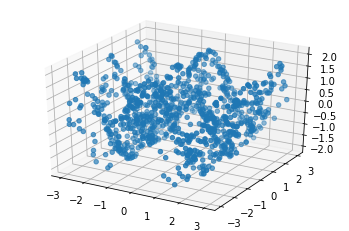

In [29]:
#Plot
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
#subplot 221 means make a grid of 2*2 and currently refer to 1 block of grid
#subplot 222 means make a grid of 2*2 and currently refer to 2 block of grid
#subplot 223 means make a grid of 2*2 and currently refer to 3 block of grid
#subplot 224 means make a grid of 2*2 and currently refer to 4 block of 
ax.scatter(X[:,0],X[:,1],Y[:])
plt.show()


We need to understand that our X has a shape of (100,2)ie 100 rows and 2 colmuns X1(0th) and X2(1st).N*D here our D=2

In [30]:
# Build the model
#We need to give first row as input to neuron so first row has how many inputs?Just 2 (x1,x2 ) so shape of first row 
#will be (2,) similarly all rows will be feeded as input one by one with each indidvidual of size(2,)=input_shape
model = tf.keras.models.Sequential([
                                    #No need to Flatten.Its regression
                                    tf.keras.layers.Dense(128,input_shape=(2,),activation='relu'),
                                    #No need of dropout 
                                    tf.keras.layers.Dense(1,activation=None)
])

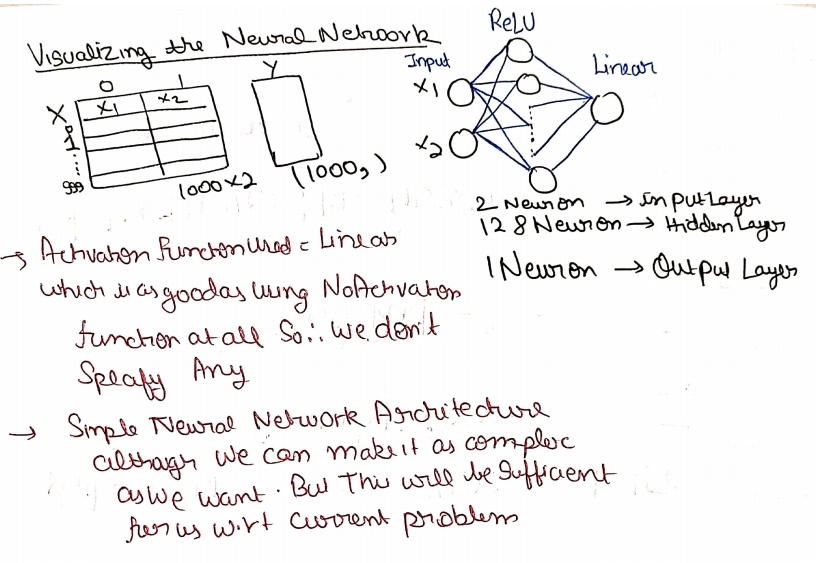

In [31]:
#Compile the model
#We create object of optimizer and set out own Learning Rate .And since its a Regression problem we use Loss Function
# as mse
obj=tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=obj,
              loss='mse',
              
              )

In [32]:
r=model.fit(X,Y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 871us/step - loss: 1.0612
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9472
Epoch 3/100
32/32 [==============================] - 0s 853us/step - loss: 0.9430
Epoch 4/100
32/32 [==============================] - 0s 886us/step - loss: 0.8891
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8723
Epoch 6/100
32/32 [==============================] - 0s 902us/step - loss: 0.7532
Epoch 7/100
32/32 [==============================] - 0s 925us/step - loss: 0.6736
Epoch 8/100
32/32 [==============================] - 0s 906us/step - loss: 0.6427
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6429
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5927
Epoch 11/100
32/32 [==============================] - 0s 985us/step - loss: 0.5837
Epoch 12/100
32/32 [==============================] - 0s 999us/step - loss: 0.5443
Epoch 13/100
32/32 [=

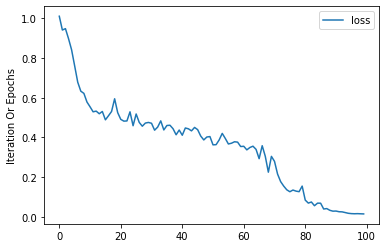

In [33]:

# Plot loss per ietration
plt.plot(r.history['loss'],label='loss')
plt.ylabel("Iteration Or Epochs")
plt.legend()

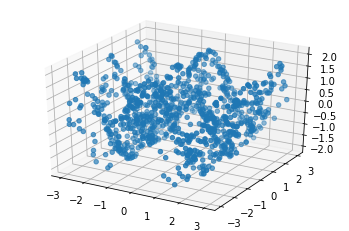

In [34]:
#Plot Prediction Surface
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y[:])
plt.show()




In [35]:
np.linspace(+3,-3,4)
#generate 4 point between rage (-3,3) which are equal spaced such that difference between any two values is same 
#For Example:array([ 3.,  1., -1., -3.]) all numbers have same difference ie 2(3-1=2,1-(-1)=2,..so on)

array([ 3.,  1., -1., -3.])

In [36]:
#Meshgrid function
a=np.linspace(3,-3,4)
print("a",a,"\n")
b=np.linspace(2,-2,5)
print("b",b)

xa=np.meshgrid(a,b)#Repeat a b number of times
xb=np.meshgrid(b,a)#Repeat b a number of times

a [ 3.  1. -1. -3.] 

b [ 2.  1.  0. -1. -2.]


In [37]:
import numpy as np  
na, nb = (5, 3)  
a = np.linspace(1, 2, na)  
print("a",a)
print()
print()
b = np.linspace(1, 2, nb)  
print("b",b)
print()
print()
#Main function of meshgrid is to create more data
xa, xb = np.meshgrid(a, b)  
print(xa)#print a b number of times(3)
print()  
print(xb)#Repeat b a number of times(5)

a [1.   1.25 1.5  1.75 2.  ]


b [1.  1.5 2. ]


[[1.   1.25 1.5  1.75 2.  ]
 [1.   1.25 1.5  1.75 2.  ]
 [1.   1.25 1.5  1.75 2.  ]]

[[1.  1.  1.  1.  1. ]
 [1.5 1.5 1.5 1.5 1.5]
 [2.  2.  2.  2.  2. ]]


In [38]:
line=np.linspace(-3,+3,50)#uniformly distributed values between -3 to+3 act as test data for our model
xx,yy=np.meshgrid(line,line)
Xgrid=np.vstack((xx.flatten(),yy.flatten())).T

In [39]:
xx.shape,yy.shape
#They are in Tuple form which is not right for our ML model.Out model expects input of (N*2)or(N,2)

((50, 50), (50, 50))

In [40]:
xx.flatten().shape

(2500,)

In [41]:
yy.flatten().shape

(2500,)

In [42]:
np.vstack((xx.flatten(),yy.flatten()))

array([[-3.        , -2.87755102, -2.75510204, ...,  2.75510204,
         2.87755102,  3.        ],
       [-3.        , -3.        , -3.        , ...,  3.        ,
         3.        ,  3.        ]])

In [43]:
np.vstack((xx.flatten(),yy.flatten())).shape

(2, 2500)

In [44]:
type(Xgrid)
print(Xgrid.T.shape) #Input of form N,2


(2, 2500)


In [53]:
#prediction is Done
xx,yy=np.meshgrid(line,line)
Xgrid=np.vstack((xx.flatten(),yy.flatten())).T
Yhat=model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat,linewidth=0.2,antialiased=True)
plt.show();

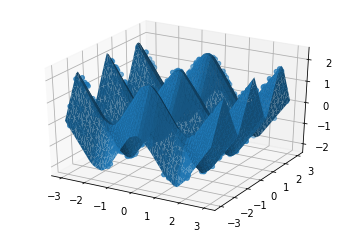

In [54]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y[:])

line=np.linspace(-3,+3,50)#uniformly distributed values between -3 to+3 act as test data for our model
xx,yy=np.meshgrid(line,line)
Xgrid=np.vstack((xx.flatten(),yy.flatten())).T
xx,yy=np.meshgrid(line,line)
Xgrid=np.vstack((xx.flatten(),yy.flatten())).T
Yhat=model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat,linewidth=0.2,antialiased=True)
plt.show();

NN Manages to approx very well in this case

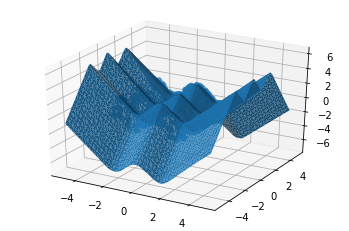

In [55]:
#Can NN Extrapolate
# No Not at all they cannot extrapolate .It assumes pattern keeps on going in same direction.For a human
#suppose we are given a sin wave and assume a NN has been trained only from 0 to 2pi so after 2pi if we
#ask value at any point a human can extrapolate the graph and tell the value but for a NN it wont extrapolate
#instead it will assume value to be at same line and increase infinitesimally large just as graph below which
#continues to move continuously upwards
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y[:])

line=np.linspace(-5,+5,50)#uniformly distributed values between -3 to+3 act as test data for our model
xx,yy=np.meshgrid(line,line)
Xgrid=np.vstack((xx.flatten(),yy.flatten())).T
xx,yy=np.meshgrid(line,line)
Xgrid=np.vstack((xx.flatten(),yy.flatten())).T
Yhat=model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat,linewidth=0.2,antialiased=True)
plt.show();



**Comparision of Original and Extrapolated Graph Figure**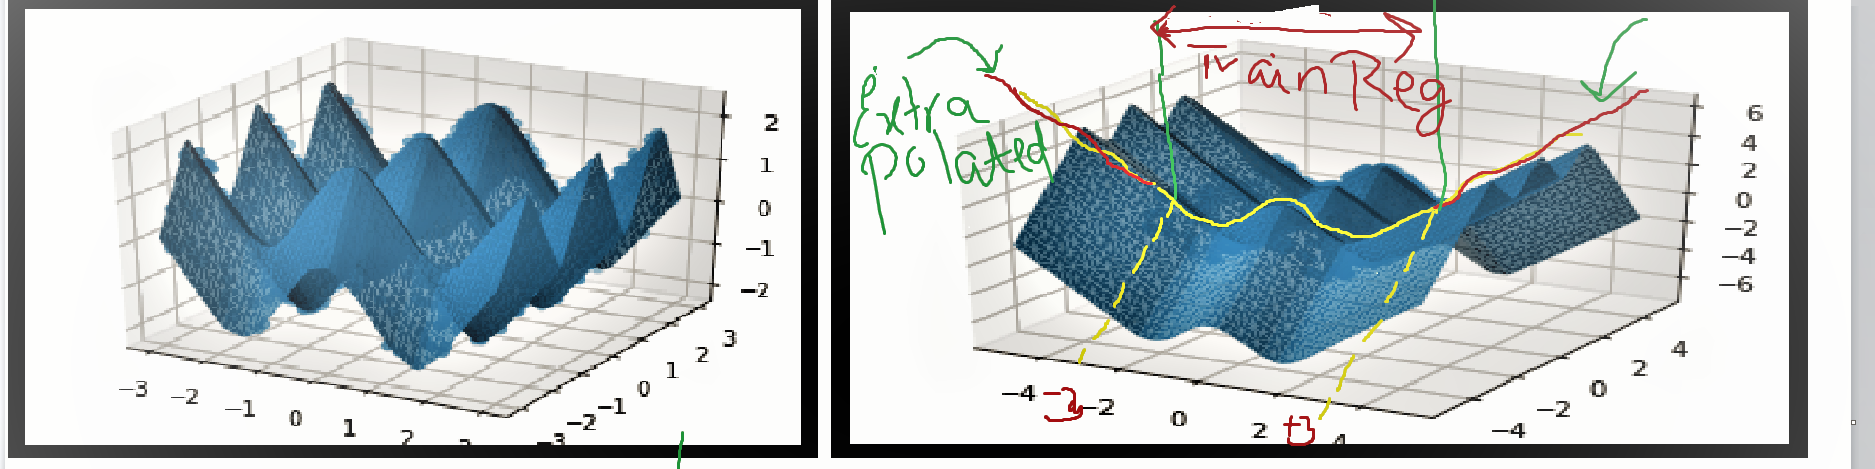

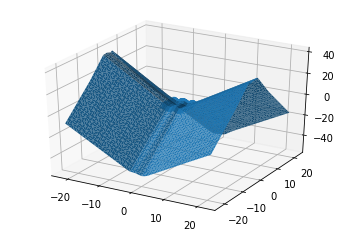

In [56]:

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y[:])

line=np.linspace(-22,+22,50)#uniformly distributed values between -3 to+3 act as test data for our model
xx,yy=np.meshgrid(line,line)
Xgrid=np.vstack((xx.flatten(),yy.flatten())).T
xx,yy=np.meshgrid(line,line)
Xgrid=np.vstack((xx.flatten(),yy.flatten())).T
Yhat=model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat,linewidth=0.2,antialiased=True)
plt.show();

**Hence its does not work quite well.Infact it assumes that the pattern keeps going in the direction it was going at the edges.And Ofcourse we should understand that NN does not use periodic activation function therefore we should not expect it to be periodic wrt inputs** 